# Filtros espaciais

Autor: Almir Soares Firmo Filho

O objetivo deste notebook é mostrar como desenvolver um programa em Python para aplicar diversos filtros espaciais na imagem capturada pela câmera, utilizando a função de convolução "filter2D()" do OpenCV, e exibir o resultado em tempo real.

In [1]:
# Importar bibliotecas necessárias
import cv2
import numpy as np
import matplotlib.pyplot as plt

Antes de mais nada é necessário criar o objeto de captura que será utilizado como fonte de video (câmera do sistema):

In [ ]:
# Criar objeto com a câmera do sistema (normalmente índice 0)
cap = cv2.VideoCapture(0)

## Kernels dos filtros

Para utilizar a função de convolução do OpenCV é necessário declarar o kernel da convolução, que normalmente é uma matriz 3x3 que permite realizar uma determinada operação sobre a imagem.

In [ ]:
# Definir máscara para a média
avg_kernel = np.array([[0.111,0.111,0.111],
                       [0.111,0.111,0.111],
                       [0.111,0.111,0.111]])

# Definir máscara para a gaussiana
gauss_kernel = np.array([[0.0625, 0.125, 0.0625], 
                         [0.125,  0.25,  0.125],
                         [0.0625, 0.125, 0.0625]])
                        
# Definir máscara para o gradiente horizontal
horizontal_kernel = np.array([[-1, 0, 1], 
                              [-2, 0, 2],
                              [-1, 0, 1]])
                              
# Definir máscara para o gradiente vertical
vertical_kernel = np.array([[-1, -2, -1], 
                            [ 0,  0,  0],
                            [ 1,  2,  1]])

# Definir máscara para o laplaciano
laplace_kernel = np.array([[0, -1, 0], 
                            [ -1,  4,  -1],
                            [ 0,  -1,  0]])

# Definir máscara para o boost
boost_kernel = np.array([[0, -1, 0], 
                         [ -1,  5.2,  -1],
                         [ 0,  -1,  0]])

É possível definir um dicionário de máscaras para facilitar o uso com a função de convolução:

In [ ]:
# Definir dicionário de máscaras
masks = {'avg':         avg_kernel,
         'gauss':       gauss_kernel,
         'horizontal':  horizontal_kernel,
         'vertical':    vertical_kernel,
         'laplaciano':  laplace_kernel,
         'boost':       boost_kernel}

Foram inicializadas todas as variáveis a serem utilizadas posteriormente:

In [ ]:
# Criar valores iniciais para variáveis
filter_type = 'avg'
first_pass = True
avg = 0
gauss = 0
hor = 0
ver = 0
lap = 0
boost = 0
absolute = 0
cinza = 0

Testa-se a abertura correta da câmera:

In [ ]:
# Testar a abertura da câmera
if cap.isOpened() == True:
    print("Camera ok")
else:
    print('Não foi possível ligar a câmera')

A rotina principal roda infinitamente e só é finalizada quando a tecla 'q' é pressionada. O conjunto de kernels declarados podem ser ativados e sobrepostos ao pressionar a tecla chave correspondente de cada um:

- 'a': média;
- 'g': gaussiana;
- 'h': gradiente horizontal;
- 'v': gradiente vertical;
- 'l': laplaciano;
- 'b': boost;
- ',': módulo;
- 'c': tom de cinza

Primeiramente é feita a captura do frame:

In [ ]:
# Começar rotina principal
while(True):
    # Nome padrão para a janela 2
    window_name = 'filtered '
    
    # Capturar frame a frame
    ret, frame = cap.read()

Em seguida o frame é espelhado pela função "flip":

In [ ]:
    # Espelhar o frame
    frame = cv2.flip(frame, 1)

O frame pós processamento é inicializado com o valor do frame atual:

In [ ]:
    filtered_frame = frame.copy()

E o comando é registrado ao pressionar qualquer tecla:

In [ ]:
    # Capturar tecla
    com = cv2.waitKey(1)

A partir de então é estabelecido um padrão de código para possibilitar a sobreposição de diferentes filtros ao frame capturado. Caso uma tecla chave seja pressionada ela deve ativar modificar uma variável que vai permitir a aplicação de um determinado filtro espacial na imagem. É possível até mesmo aplicar todos os filtros de uma só vez ou combinar diferentes filtros através desse programa.

Para saber quais filtros estão ativos basta olhar o nome da janela, que exibe tal informação:

In [ ]:
    ## Decidir qual imagem exibir
    # Não fazer nada se nenhuma tecla for pressionada
    if com == -1:
        _ = 0
        
    # Sair do programa se a tecla 'q' for apertada
    if com == ord('q'):
        break

    # Exibir a imagem em tons de cinza se a tecla 'c' for apertada
    if com == ord('c'):
        first_pass = False
        if cinza == 0:
            cinza = 1
        else:
            cinza = 0
        cv2.destroyAllWindows()
    if cinza == 1:
        window_name += 'cinza '
        filtered_frame = cv2.cvtColor(filtered_frame, cv2.COLOR_BGR2GRAY)
    
    # Exibir a imagem processada com o filtro da média se a tecla 'a' for apertada
    if com == ord('a'):
        first_pass = False
        if avg == 0:
            avg = 1
        else:
            avg = 0
        cv2.destroyAllWindows()
    if avg == 1:
        window_name += 'average '
        filtered_frame = cv2.filter2D(filtered_frame,-1,kernel=masks['avg'])
    
    # Exibir a imagem processada com o filtro da gaussiana se a tecla 'g' for apertada
    if com == ord('g'):
        first_pass = False
        if gauss == 0:
            gauss = 1
        else:
            gauss = 0
        cv2.destroyAllWindows()
    if gauss == 1:
        window_name += 'gaussian '
        filtered_frame = cv2.filter2D(filtered_frame,-1,kernel=masks['gauss'])
        
    # Exibir a imagem processada com o filtro do gradiente horizontal se a tecla 'h' for apertada
    if com == ord('h'):
        first_pass = False
        if hor == 0:
            hor = 1
        else:
            hor = 0
        cv2.destroyAllWindows()
    if hor == 1:
        window_name += 'gradiente horizontal '
        filtered_frame = cv2.filter2D(filtered_frame,-1,kernel=masks['horizontal'])
        
    # Exibir a imagem processada com o filtro do gradiente vertical se a tecla 'v' for apertada
    if com == ord('v'):
        first_pass = False
        if ver == 0:
            ver = 1
        else:
            ver = 0
        cv2.destroyAllWindows()
    if ver == 1:
        window_name += 'gradiente vertical '
        filtered_frame = cv2.filter2D(filtered_frame,-1,kernel=masks['vertical'])

    # Exibir a imagem processada com o filtro do laplaciano se a tecla 'l' for apertada
    if com == ord('l'):
        first_pass = False
        if lap == 0:
            lap = 1
        else:
            lap = 0
        cv2.destroyAllWindows()
    if lap == 1:
        window_name += 'laplaciano'
        filtered_frame = cv2.filter2D(filtered_frame,-1,kernel=masks['laplaciano'])

    # Exibir a imagem processada com o filtro do laplaciano se a tecla 'l' for apertada
    if com == ord('b'):
        first_pass = False
        if boost == 0:
            boost = 1
        else:
            boost = 0
        cv2.destroyAllWindows()
    if boost == 1:
        window_name += 'boost '
        filtered_frame = cv2.filter2D(filtered_frame,-1,kernel=masks['boost'])

    # Exibir a imagem processada com o filtro do módulo da soma do gradiente vertical e horizontal se a tecla ',' for apertada
    if com == ord(','):
        first_pass = False
        if absolute == 0:
            absolute = 1
        else:
            absolute = 0
        cv2.destroyAllWindows()
    if absolute == 1:
        window_name += 'absolute '
        filtered_frame = np.abs(filtered_frame)

Para exibir o resultado em tempo real utiliza-se a função 'imshow' duas vezes, sendo uma com o frame original e uma com o frame pós processamento:

In [ ]:
    # Exibir imagens
    cv2.namedWindow('Original image',cv2.WINDOW_AUTOSIZE)
    cv2.namedWindow(window_name,cv2.WINDOW_AUTOSIZE)
    cv2.imshow('Original image', frame)
    cv2.imshow(window_name, filtered_frame)

Ao final a câmera é desligada e as janelas são destruídas:

In [ ]:
# Finalizar a captura e fecha as janelas abertas
cap.release()
cv2.destroyAllWindows()

Um exemplo dessa aplicação em funcionamento pode ser obtido quando utilizamos o filtro do laplaciano com o filtro da gaussiana e sem o filtro da gaussiana:

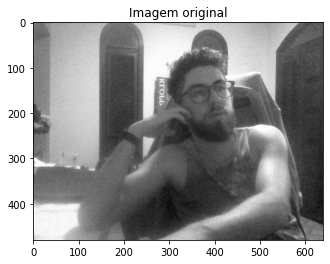

In [2]:
# Carregar imagem original
input_image = cv2.imread('saved_img3.png', cv2.IMREAD_GRAYSCALE)

plt.title('Imagem original')
plt.imshow(input_image, cmap='gray')
plt.show()

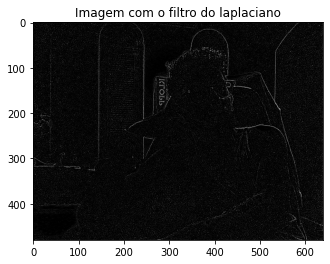

In [3]:
laplacian_image = cv2.imread('filtered_saved_img3.png', cv2.IMREAD_GRAYSCALE)
laplacian_gaussian_image = cv2.imread('filtered_saved_img4.png', cv2.IMREAD_GRAYSCALE)

plt.title('Imagem com o filtro do laplaciano')
plt.imshow(laplacian_image, cmap='gray')
plt.show()

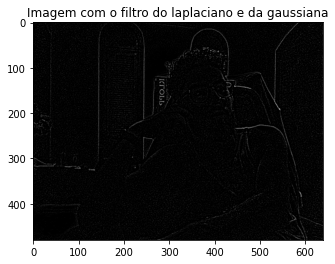

In [4]:
plt.title('Imagem com o filtro do laplaciano e da gaussiana')
plt.imshow(laplacian_gaussian_image, cmap='gray')
plt.show()

É possível perceber que a imagem sem o filtro da gaussiana exibe mais contornos, porém muitos deles são falsos (causados por ruído). Quando aplicamos o filtro da gaussiana antes do laplaciano percebemos que os contornos são menos acentuados, porém o ruído fica consideravelmente menor.